## Summary of this notebook:

### This notebook uses the Naive Bayes method to predict if a message on Amazon is positive.  Comparisons were made with imdb data and yelp data to testing various features.
### Questions:
1.  Do any of your classifiers seem to overfit?
    - yes, my accuracy went from 276 (mislabeled) to 292 (with imdb) to 320 (with yelp).  The data I studied the most to pick out classifiers was amazon, followed by imdb which is probably why my accuracy was better in those two data sets.  I was fitting the classifiers perhaps too closely to that data and wasn't as accurate for the yelp data.
2.  Which seem to perform the best? Why?
    - I tried to add many different words from the data and they all seemed to help a little.
    - adding a 'not' column and then making this boolean value its opposite worked well. 
3.  Which features seemed to be most impactful to performance?
    - adding an exclamation point to predict positive reviews created more mislabeled points. (went from 276 to 291) 


In [98]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Grab and process the raw data.
data_path = (r"C:\Users\Fred\Desktop\SA\amazon_cells_labelled.txt")

sa_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sa_raw.columns = ['comment', 'score']

In [100]:
print(len(sa_raw))
sa_raw.head(n=200)

1000


,comment,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [101]:
keywords = ['not', 'good', 'great', 'excellent', 'love', 'loves', 'recommend', 'nice', 'beautiful', 'super', 'best', 'awesome', 'cool']
           
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sa_raw[str(key)] = sa_raw.comment.str.contains(str(key), case=False)

In [102]:
#not_keywords = ['not']
#for key in not_keywords:
#    sa_raw[str(key)] = sa_raw.comment.str.contains(str(key), case=False)==0

In [103]:
sa_raw['not'] = sa_raw.comment.str.contains(str('not'), case=False)==0
sa_raw['waste'] = sa_raw.comment.str.contains(str('waste'), case=False)==0

In [104]:
sa_raw.head(n=200)

,comment,score,not,good,great,excellent,love,loves,recommend,nice,beautiful,super,best,awesome,cool,waste
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,"Good case, Excellent value.",1,True,True,False,True,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,1,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,The mic is great.,1,True,False,True,False,False,False,False,False,False,False,False,False,False,True
5,I have to jiggle the plug to get it to line up...,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True
6,If you have several dozen or several hundred c...,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True
7,If you are Razr owner...you must have this!,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True
8,"Needless to say, I wasted my money.",0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [105]:
sa_raw['score'] = sa_raw['score'].astype(str)


In [106]:
sa_raw['score'] = (sa_raw['score'] == '1')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [107]:
sa_raw.head()

,comment,score,not,good,great,excellent,love,loves,recommend,nice,beautiful,super,best,awesome,cool,waste
0,So there is no way for me to plug it in here i...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,"Good case, Excellent value.",True,True,True,False,True,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,The mic is great.,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True


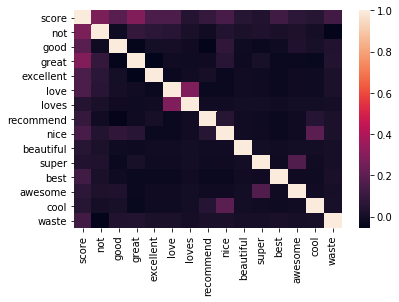

In [108]:
sns.heatmap(sa_raw.corr())
#sns.heatmap(sms_raw.corr())

In [109]:
#data = sms_raw[keywords + ['allcaps'] + ['ex_marks']]
#target = sms_raw['spam']

data = sa_raw[keywords + ['not'] + ['waste']]
target = sa_raw['score']

In [110]:
from sklearn.naive_bayes import BernoulliNB


In [111]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

In [112]:
# Fit our model to the data.
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [113]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [114]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 265


In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[484,  16],
       [249, 251]], dtype=int64)

## Conclusion:

### The number of mislabeled points out of 1000 is 265 so far.  Adding a 'waste' feature did not improve or change results at all.  From the confusion matrix, only 16 false positives doesn't seem too bad.  Most improvement to the model can be found by decreasing the number of false negatives - in other words finding better features to identify a positive review.